# Miljødataanalyse - Del 1, Oppgave 2.

In [ ]:
# Sjekk directory
import os
print(os.getcwd())

In [34]:
#Markus eksperimenterer med en alternativ API her.

# Test: Importere og bruke API fra openweathermap.org

import requests
import pandas as pd
import json
import matplotlib.pyplot as plt # for plotting
import os
from dotenv import load_dotenv
load_dotenv()

api_key = os.getenv('API_KEY')

city = 'Oslo'

url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric'

res = requests.get(url)
data = res.json()


humidity = data['main']['humidity']
pressure = data['main']['pressure']
wind = data['wind']['speed']
description = data['weather'][0]['description']
temp = data['main']['temp']

print('Temperature:',temp,'°C')
print('Wind:',wind)
print('Pressure: ',pressure)
print('Humidity: ',humidity)
print('Description:',description)


df = pd.json_normalize(data)

print(df)

# df_data = pd.DataFrame(data)

# df_data.drop_duplicates(inplae=True)
# df_no_duplicates = df_data.drop_duplicates()

# print(df_data)




Temperature: 13.33 °C
Wind: 3.55
Pressure:  1005
Humidity:  60
Description: overcast clouds
                                             weather      base  visibility  \
0  [{'id': 804, 'main': 'Clouds', 'description': ...  stations       10000   

           dt  timezone       id  name  cod  coord.lon  coord.lat  ...  \
0  1743081161      3600  3143244  Oslo  200    10.7461    59.9127  ...   

   main.grnd_level  wind.speed  wind.deg  wind.gust  clouds.all  sys.type  \
0              981        3.55       225       7.16         100         2   

   sys.id  sys.country  sys.sunrise  sys.sunset  
0   46775           NO   1743051434  1743097637  

[1 rows x 27 columns]


In [4]:
#Nika
#open-meteo.com
#Historical forecast -- For Trondheim
#https://open-meteo.com/en/docs/historical-forecast-api
#https://open-meteo.com/en/docs/historical-forecast-api?hourly=temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,showers,snowfall,snow_depth,pressure_msl,cloud_cover,visibility,wind_speed_10m,wind_speed_80m,wind_speed_120m,wind_speed_180m,wind_direction_10m,wind_direction_80m,wind_direction_120m,wind_direction_180m,wind_gusts_10m,temperature_80m,temperature_120m,temperature_180m,soil_temperature_0cm,soil_temperature_6cm,soil_temperature_18cm,soil_temperature_54cm,soil_moisture_0_to_1cm,soil_moisture_1_to_3cm,soil_moisture_3_to_9cm,soil_moisture_9_to_27cm,soil_moisture_27_to_81cm&daily=temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,wind_speed_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,wind_gusts_10m_max,uv_index_clear_sky_max,uv_index_max,sunshine_duration,daylight_duration,sunrise,sunset,rain_sum,showers_sum,snowfall_sum,precipitation_sum,precipitation_hours&latitude=63.4305&longitude=10.3951&timezone=Europe%2FBerlin
'''
#Installer forecast greiene
pip install openmeteo-requests
pip install requests-cache retry-requests numpy pandas
'''

#Imports
import openmeteo_requests
import requests_cache
import pandas as pd
import matplotlib.pyplot as plt
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://historical-forecast-api.open-meteo.com/v1/forecast"
params = {
	"latitude": 63.4305,
	"longitude": 10.3951,
	"start_date": "2024-08-01",
	"end_date": "2025-04-07",
	"daily": ["temperature_2m_max", "temperature_2m_min", "apparent_temperature_max", "apparent_temperature_min", "wind_speed_10m_max", "wind_direction_10m_dominant", "shortwave_radiation_sum", "wind_gusts_10m_max", "uv_index_clear_sky_max", "uv_index_max", "sunshine_duration", "daylight_duration", "sunrise", "sunset", "rain_sum", "showers_sum", "snowfall_sum", "precipitation_sum", "precipitation_hours"],
	"hourly": ["temperature_2m", "relative_humidity_2m", "apparent_temperature", "precipitation", "rain", "showers", "snowfall", "snow_depth", "pressure_msl", "cloud_cover", "visibility", "wind_speed_10m", "wind_speed_80m", "wind_speed_120m", "wind_speed_180m", "wind_direction_10m", "wind_direction_80m", "wind_direction_120m", "wind_direction_180m", "wind_gusts_10m", "temperature_80m", "temperature_120m", "temperature_180m", "soil_temperature_0cm", "soil_temperature_6cm", "soil_temperature_18cm", "soil_temperature_54cm", "soil_moisture_0_to_1cm", "soil_moisture_1_to_3cm", "soil_moisture_3_to_9cm", "soil_moisture_9_to_27cm", "soil_moisture_27_to_81cm"],
    "timezone": "Europe/Berlin"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()}{response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")
print(f'Sted: Trondheim')

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_temperature_2m_max = daily.Variables(0).ValuesAsNumpy()
daily_temperature_2m_min = daily.Variables(1).ValuesAsNumpy()
daily_apparent_temperature_max = daily.Variables(2).ValuesAsNumpy()
daily_apparent_temperature_min = daily.Variables(3).ValuesAsNumpy()
daily_wind_speed_10m_max = daily.Variables(4).ValuesAsNumpy()
daily_wind_direction_10m_dominant = daily.Variables(5).ValuesAsNumpy()
daily_shortwave_radiation_sum = daily.Variables(6).ValuesAsNumpy()
daily_wind_gusts_10m_max = daily.Variables(7).ValuesAsNumpy()
daily_uv_index_clear_sky_max = daily.Variables(8).ValuesAsNumpy()
daily_uv_index_max = daily.Variables(9).ValuesAsNumpy()
daily_sunshine_duration = daily.Variables(10).ValuesAsNumpy()
daily_daylight_duration = daily.Variables(11).ValuesAsNumpy()
daily_sunrise = daily.Variables(12).ValuesAsNumpy()
daily_sunset = daily.Variables(13).ValuesAsNumpy()
daily_rain_sum = daily.Variables(14).ValuesAsNumpy()
daily_showers_sum = daily.Variables(15).ValuesAsNumpy()
daily_snowfall_sum = daily.Variables(16).ValuesAsNumpy()
daily_precipitation_sum = daily.Variables(17).ValuesAsNumpy()
daily_precipitation_hours = daily.Variables(18).ValuesAsNumpy()
daily_data_temp = {"date": pd.date_range(
    start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
    end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
    freq = pd.Timedelta(seconds = daily.Interval()),
    inclusive = "left"
)}
daily_data_wind = {"date": pd.date_range(
    start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
    end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
    freq = pd.Timedelta(seconds = daily.Interval()),
    inclusive = "left"
)}
daily_data_sun = {"date": pd.date_range(
    start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
    end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
    freq = pd.Timedelta(seconds = daily.Interval()),
    inclusive = "left"
)}
daily_data_rain = {"date": pd.date_range(
    start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
    end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
    freq = pd.Timedelta(seconds = daily.Interval()),
    inclusive = "left"
)}

#Daily_data_temperature
daily_data_temp["temperature_2m_max"] = daily_temperature_2m_max
daily_data_temp["temperature_2m_min"] = daily_temperature_2m_min
daily_data_temp["apparent_temperature_max"] = daily_apparent_temperature_max
daily_data_temp["apparent_temperature_min"] = daily_apparent_temperature_min
daily_dataframe_temp = pd.DataFrame(data = daily_data_temp)
print(daily_dataframe_temp)

#Daily_data_wind
daily_data_wind["wind_speed_10m_max"] = daily_wind_speed_10m_max
daily_data_wind["wind_direction_10m_dominant"] = daily_wind_direction_10m_dominant
daily_data_wind["wind_gusts_10m_max"] = daily_wind_gusts_10m_max
daily_dataframe_wind = pd.DataFrame(data = daily_data_wind)
print(daily_dataframe_wind)

#Daily_data_sun
daily_data_sun["shortwave_radiation_sum"] = daily_shortwave_radiation_sum
daily_data_sun["uv_index_clear_sky_max"] = daily_uv_index_clear_sky_max
daily_data_sun["uv_index_max"] = daily_uv_index_max
daily_data_sun["sunshine_duration"] = daily_sunshine_duration
daily_data_sun["daylight_duration"] = daily_daylight_duration
daily_data_sun["sunrise"] = daily_sunrise
daily_data_sun["sunset"] = daily_sunset
daily_dataframe_sun = pd.DataFrame(data = daily_data_sun)
print(daily_dataframe_sun)

#Daily_data_water
daily_data_rain["rain_sum"] = daily_rain_sum
daily_data_rain["showers_sum"] = daily_showers_sum
daily_data_rain["snowfall_sum"] = daily_snowfall_sum
daily_data_rain["precipitation_sum"] = daily_precipitation_sum
daily_data_rain["precipitation_hours"] = daily_precipitation_hours
daily_dataframe_wind = pd.DataFrame(data = daily_data_wind)
print(daily_dataframe_wind)


Coordinates 63.42746353149414°N 10.403427124023438°E
Elevation 12.0 m asl
Timezone b'Europe/Berlin'b'GMT+2'
Timezone difference to GMT+0 7200 s
Sted: Trondheim
                         date  temperature_2m_max  temperature_2m_min  \
0   2024-07-31 22:00:00+00:00           18.765001              12.065   
1   2024-08-01 22:00:00+00:00           19.715000               9.565   
2   2024-08-02 22:00:00+00:00           23.965000              11.065   
3   2024-08-03 22:00:00+00:00           23.965000              14.815   
4   2024-08-04 22:00:00+00:00           25.165001              15.615   
..                        ...                 ...                 ...   
245 2025-04-02 22:00:00+00:00            8.615000               3.815   
246 2025-04-03 22:00:00+00:00            5.215000               2.715   
247 2025-04-04 22:00:00+00:00            6.315000               3.165   
248 2025-04-05 22:00:00+00:00            7.815000               4.665   
249 2025-04-06 22:00:00+00:00        

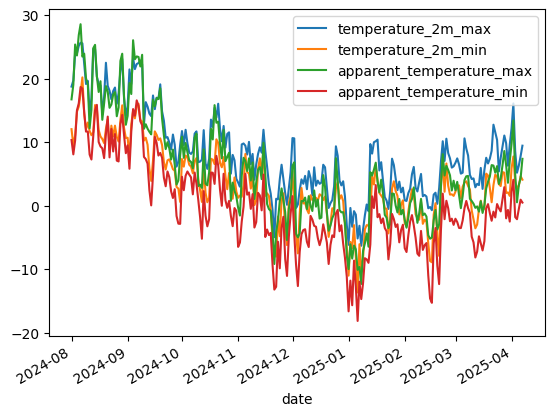

In [ ]:
#Her skal vi fjerne noe av dataen for å gjøre datasettet mer ufulstendig.


'''
daily_dataframe_temp.plot(x="date")
plt.show()
'''